In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB
None


<BarContainer object of 12 artists>

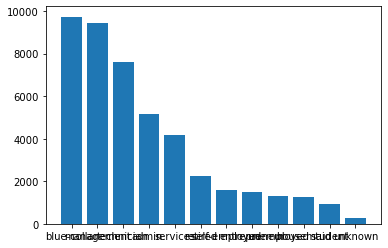

In [9]:
#Fazendo o carregamento dos dados diretamente do UCI Machine Learning  
      
dataset = pd.read_csv('C:\\Users\\pveso\\Documents\\IA\\IA_Projects\\SVM\\bank-full.csv', ';')
#Copy of the dataset to to manipulate it 
dataset_cpy = dataset.copy()
#saving the labels
labels = dataset_cpy.loc[:, "y"]
#drops the duration table
dataset_cpy = dataset_cpy.drop(['duration', 'y'], axis=1)
print(dataset_cpy.info())
#Plotagem dos dados categoricos da feature job para visualização
plt.bar(dataset_cpy.job.value_counts().index, dataset_cpy.job.value_counts().values)

In [10]:
#label encoder para transformar variáveis categóricas em números
labelEncoder = LabelEncoder()

label_job = labelEncoder.fit_transform(dataset_cpy.job)
label_marital = labelEncoder.fit_transform(dataset_cpy.marital)
label_education = labelEncoder.fit_transform(dataset_cpy.education)
label_default = labelEncoder.fit_transform(dataset_cpy.default)
label_housing = labelEncoder.fit_transform(dataset_cpy.housing)
label_loan = labelEncoder.fit_transform(dataset_cpy.loan)
label_contact = labelEncoder.fit_transform(dataset_cpy.contact)
label_month = labelEncoder.fit_transform(dataset_cpy.month)
label_poutcome = labelEncoder.fit_transform(dataset_cpy.poutcome)
#label_day_of_week = labelEncoder.fit_transform(dataset_cpy.day_of_week)

labels_1 = labelEncoder.fit_transform(labels)

dataset_cpy['job'] = label_job
dataset_cpy['marital'] = label_marital
dataset_cpy['education'] = label_education
dataset_cpy['default'] = label_default
dataset_cpy['housing'] = label_housing
dataset_cpy['loan'] = label_loan
dataset_cpy['contact'] = label_contact
dataset_cpy['month'] = label_month
dataset_cpy['poutcome'] = label_poutcome
#dataset_cpy['day_of_week'] = label_day_of_week


#Iniciando a codificação dos dados utilizando a função dummies do pandas

labelsJob = pd.get_dummies(dataset_cpy['job'], drop_first = True)
pd.concat([dataset_cpy, labelsJob], axis=1)
labelMarital = pd.get_dummies(dataset_cpy['marital'], drop_first = True)
pd.concat([dataset_cpy, labelMarital], axis=1)
labelEducation = pd.get_dummies(dataset_cpy['education'], drop_first = True)
pd.concat([dataset_cpy, labelEducation], axis=1)
labelDefault = pd.get_dummies(dataset_cpy['default'], drop_first = True)
pd.concat([dataset_cpy, labelDefault], axis=1)
labelHousing = pd.get_dummies(dataset_cpy['housing'], drop_first = True)
pd.concat([dataset_cpy, labelHousing], axis=1)
labelLoan = pd.get_dummies(dataset_cpy['loan'])
pd.concat([dataset_cpy, labelLoan], axis=1)
labelContact = pd.get_dummies(dataset_cpy['contact'], drop_first = True)
pd.concat([dataset_cpy, labelContact], axis=1)
labelMonth = pd.get_dummies(dataset_cpy['month'])
pd.concat([dataset_cpy, labelMonth], axis=1)
labelPoutcome = pd.get_dummies(dataset_cpy['poutcome'], drop_first = True)
pd.concat([dataset_cpy, labelPoutcome], axis=1)
#labelDayOfWeek = pd.get_dummies(dataset_cpy['day_of_week'], drop_first = True)
#pd.concat([dataset_cpy, labelDayOfWeek], axis = 1)

print(dataset_cpy.head(10))

#Aplicando a normalização nos dados
for col in dataset_cpy.columns:
   dataset_cpy[col] = (dataset_cpy[col] - dataset_cpy[col].min()) / (dataset_cpy[col].max() - dataset_cpy[col].min())

print(dataset_cpy.head(10))


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  campaign  pdays  previous  poutcome  
0    5      8         1     -1         0         3  
1    5      8         1     -1         0      

In [11]:
#Realizando a divisão dos dados
X = dataset_cpy.values
Y = labels_1

#Separação dos dados em treinamento e validação
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=10)

clf = SVC()

clf.fit(X_train, Y_train)

kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = range(1,5) #0.001
k_scores_train = []
k_scores_valid = []

# use iteration to caclulator different kernels in models, then return the average accuracy based on the cross validation

for k in range(4):
    for j in c_range:
      svc = SVC(C=j, random_state=10, kernel=kernels_range[k])
      scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring='accuracy')
      k_scores_train.append(scores.mean())
      svc.fit(X_train, Y_train)
      k_scores_valid.append(svc.score(X_valid, Y_valid))

# plot to see clearly

plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.legend(('Trainamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of kernels for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, Y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_valid, Y_valid))
